# ADL HW2 - PCA and Autoencoders
In this assignment you will implement two dimensionality reduction schemes
we saw in class:
1. Principal Component Analysis (PCA)
2. Autoencoder

You will also implement an image denoising model to enhance the performance of a simple MLP classifier.

The data used in the following exercises is a subset of the MNIST dataset.
Randomly sample 10,000 images from MNIST train set (you may set a random.seed).

# Submission Date: 05.01.2025
Submit the already-run notebook.


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from tqdm.auto import tqdm

# EX1. PCA dimensionality reduction (10pts)

1. Implement the PCA procedure in the function ```perform_PCA()```.

Useful functions:
```
sklearn.preprocessing.StandardScaler
scipy.linalg.eigh
numpy.matmul
```
The input should be in vector form (i.e., flatten the input images beforehand).

2. Project the data to 2D, i.e, $\mathbb{R}^{784}↦ \mathbb{R}^2$.
3. Scatter plot the data using the 2D projection and class labels. You'll need to implement ```plot_projected_data()```


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

def perform_PCA(X, n_components):
  """
  Implement the PCA algorithm.
  Input: X [numpy array] - shape: (N,784)
  Output: Projected data using n_components
  """
  # Step 1: Standardize the data
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Step 2: Compute the covariance matrix
  covariance_matrix = np.matmul(X_scaled.T, X_scaled) / (X_scaled.shape[0] - 1)

  # Step 3: Compute the eigenvalues and eigenvectors
  eigenvalues, eigenvectors = eigh(covariance_matrix)

  # Step 4: Select the top `n_components` eigenvectors
  # Eigh sorts eigenvalues in ascending order, so take the last `n_components`
  top_eigenvectors = eigenvectors[:, -n_components:]

  # Step 5: Project the data onto the top `n_components` eigenvectors
  X_projected = np.matmul(X_scaled, top_eigenvectors)

  return X_projected


def plot_projected_data(X, y):

  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
  plt.colorbar(scatter, label='Class Label')
  plt.title("Projection of Data")
  plt.xlabel("Dimension 1")
  plt.ylabel("Dimension 2")
  plt.grid(True)
  plt.show()

In [ ]:
# For EX5, Please use the (0.5, 0.5) normalization value, as
# they were used for training the MLP
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST train and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


# Sample 10K images
train_indices = np.random.choice(len(trainset), 10000, replace=False)
train_subset = Subset(trainset, train_indices)

trainloader = DataLoader(train_subset , batch_size=256, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=256, shuffle=False, num_workers=4)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 462kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.17MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Set PCA Projection:


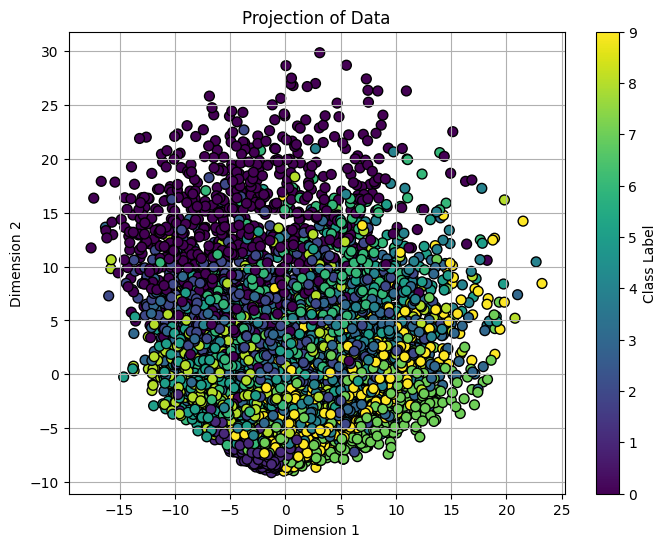

In [ ]:
### Your code goes here ###
def flatten_dataset(loader):

    X_list = []
    y_list = []

    for images, labels in loader:
        X_list.append(images.view(images.size(0), -1).numpy())  # Flatten
        y_list.append(labels.numpy())

    X = np.vstack(X_list)
    y = np.concatenate(y_list)
    return X, y

X_train, y_train_pca = flatten_dataset(trainloader)

X_train_pca = perform_PCA(X_train, n_components=2)

print("Training Set PCA Projection:")
plot_projected_data(X_train_pca, y_train_pca)


# EX2 Autoencoder (AE) (15pts)
1. Implement a fully-connected Autoencoder. The encoder and decoder should have 2 layers each. Use ReLU activation function.
2. The so-called 'code' should be two-dimensional. In other words, the output of the encoder should be 2.
3. Plot the training loss.

4. Project the data using your AE. Plot the data using ```plot_projected_data()```

In [ ]:
class MLP_AE(nn.Module):
    def __init__(self):
      super(MLP_AE, self).__init__()
      self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True),
            nn.Linear(64,2))
      self.decoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(True),
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28))

    def forward(self,x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x



  0%|          | 0/20 [00:00<?, ?epoch/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


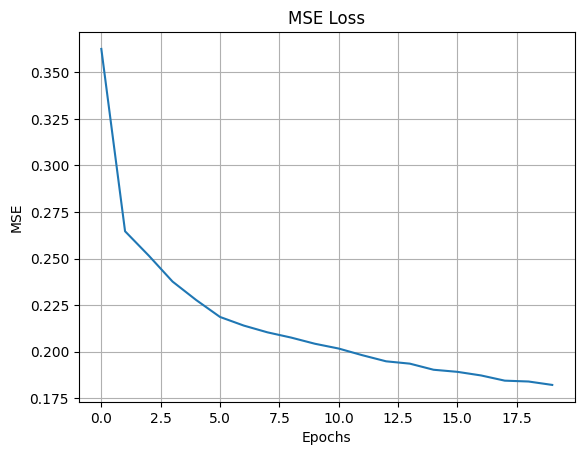

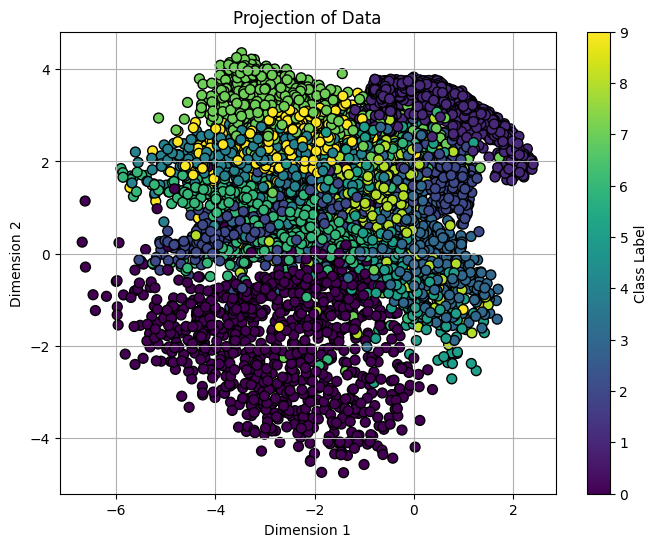

In [ ]:
def plot_loss(loss_list):
  plt.plot(loss_list)
  plt.grid()
  plt.ylabel("MSE")
  plt.xlabel("Epochs")
  plt.title("MSE Loss")

# Function to train the model
def train(model, train_loader, criterion, optimizer, epochs=25):
    model.train()
    loss_list = []
    with tqdm(total=epochs, unit="epoch", position=0, leave=True) as pbar:
      for epoch in range(epochs):
        running_loss = 0.0
        for images, _ in train_loader:
            optimizer.zero_grad()
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, images) # labels are the original images
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        loss_list.append(running_loss/len(train_loader))
        pbar.set_postfix(loss=running_loss/len(train_loader))
        pbar.update(1)
    plot_loss(loss_list)


def project_data(model, dataloader):
    """
    Project data to 2D using the encoder part of the autoencoder.
    Input:
        model - Trained autoencoder model
        dataloader - DataLoader containing the input data
    Output:
        X_projected - 2D projected data (N, 2)
        y_labels - Corresponding class labels
    """
    model.eval()
    X_projected = []
    y_labels = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(images.size(0), -1)  # Flatten the images
            latent = model.encoder(images)           # Project to 2D
            X_projected.append(latent.cpu().numpy()) # Store projected data
            y_labels.append(labels.cpu().numpy())    # Store labels
    X_projected = np.concatenate(X_projected, axis=0)
    y_labels = np.concatenate(y_labels, axis=0)
    return X_projected, y_labels



# Initialize the model, loss function, and optimizer
model_ae_mlp =  MLP_AE()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ae_mlp.parameters(), lr=0.001)
train(model_ae_mlp, trainloader, criterion, optimizer,  epochs=20)

# Project the data using the trained model
X_projected_mlp, y_labels_mlp = project_data(model_ae_mlp, trainloader)

# Plot the projected data
plot_projected_data(X_projected_mlp, y_labels_mlp)


# EX3 Linear Autoencoder (15pts)
1. Follow the steps of EX2, but remove the nonlinear activation functions.

4. Project the data using your AE. Plot the data using ```plot_projected_data()```

In [ ]:
class Linear_AE(nn.Module):
    def __init__(self):
      super(Linear_AE, self).__init__()
      self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.Linear(256, 64),
            nn.Linear(64,2))
      self.decoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.Linear(64, 256),
            nn.Linear(256, 28 * 28)
            )

    def forward(self,x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x

  0%|          | 0/20 [00:00<?, ?epoch/s]

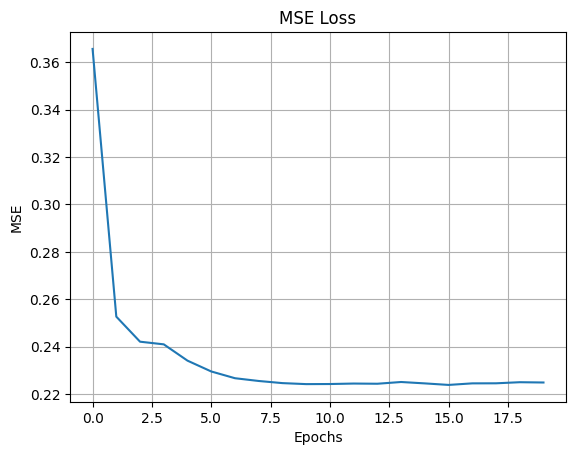

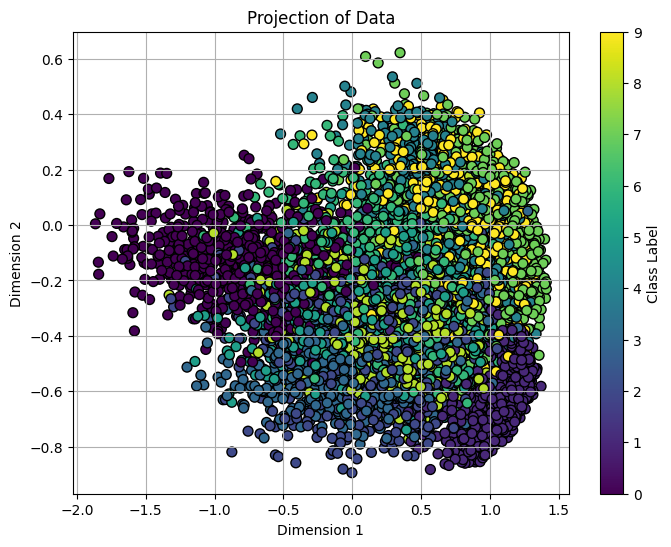

In [ ]:
### Your code goes here ###

# Initialize the model, loss function, and optimizer
model_ae_linear =  Linear_AE()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ae_linear.parameters(), lr=0.001)
train(model_ae_linear, trainloader, criterion, optimizer,  epochs=20)

# Project the data using the trained model
X_projected_linear, y_labels_linear = project_data(model_ae_linear, trainloader)

# Plot the projected data
plot_projected_data(X_projected_linear, y_labels_linear)

# EX 4 - Discussion (10pts)
1. Write a new plotting function and plot the results side-by-side using subplots.
2. Given the three figures and what we've learned about PCA and AE, answer what are the difference/similarites between the models? How is that indicated in the results?


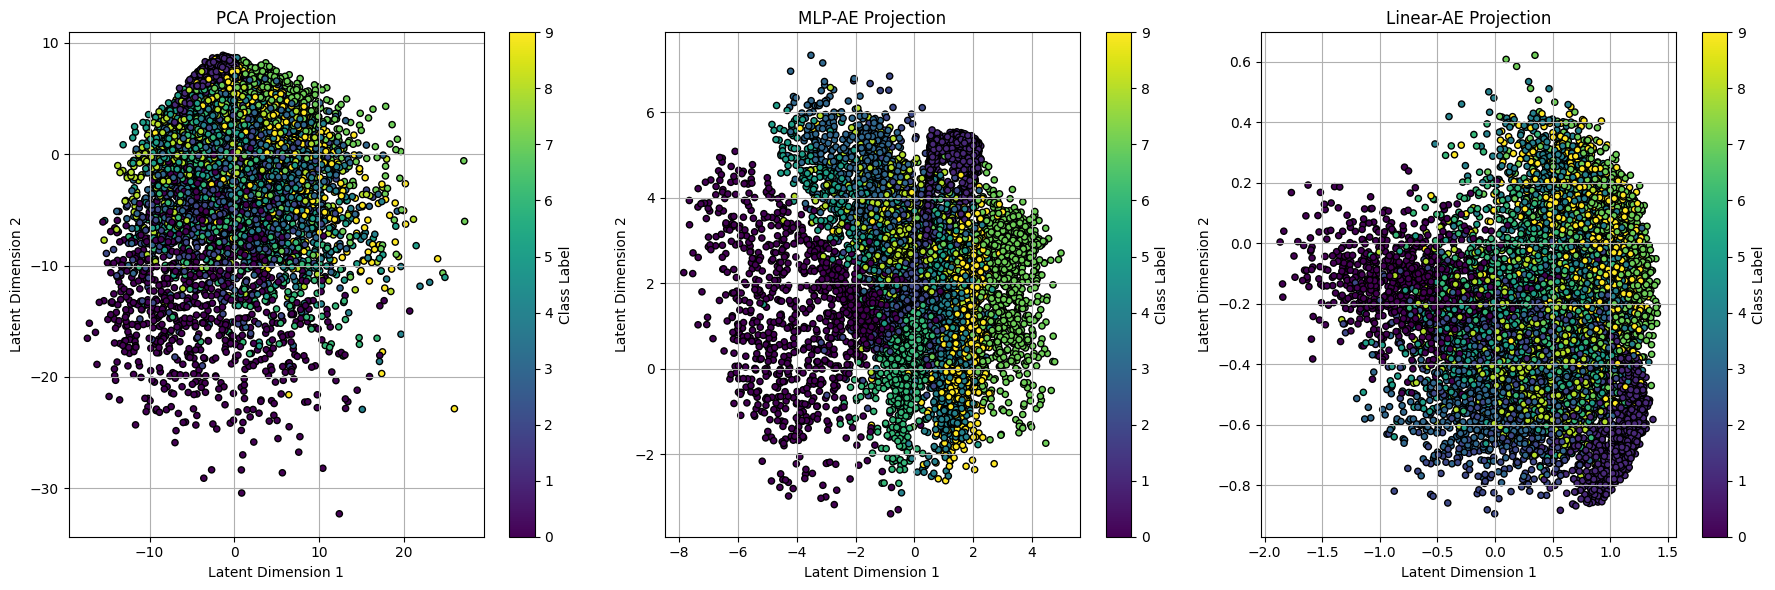

In [ ]:
def plot_side_by_side(pca_data, ae_mlp_data, ae_linear_data, y_pca, y_ae_mlp, y_ae_linear, titles):
    """
    Plot PCA, MLP-AE, and Linear-AE results side-by-side using subplots.
    Inputs:
        pca_data - 2D projected data from PCA
        ae_mlp_data - 2D projected data from MLP-AE
        ae_linear_data - 2D projected data from Linear-AE
        y_pca, y_ae_mlp, y_ae_linear - Class labels for each method
        titles - Titles for each subplot
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    datasets = [(pca_data, y_pca), (ae_mlp_data, y_ae_mlp), (ae_linear_data, y_ae_linear)]

    for ax, (data, y), title in zip(axes, datasets, titles):
        scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap="viridis", edgecolor="k", s=20)
        ax.set_title(title)
        ax.set_xlabel("Latent Dimension 1")
        ax.set_ylabel("Latent Dimension 2")
        ax.grid(True)
        cbar = plt.colorbar(scatter, ax=ax, label="Class Label")
    plt.tight_layout()
    plt.show()



# Plot PCA, MLP-AE, and Linear-AE results side by side
titles = ["PCA Projection", "MLP-AE Projection", "Linear-AE Projection"]
plot_side_by_side(X_train_pca, X_projected_mlp, X_projected_linear, y_train_pca, y_labels_mlp, y_labels_linear, titles)


**Comparison of Models**


**1. PCA**


**How It Works:**


PCA linearly projects the data onto the top principal components that capture
the most variance.
The projection depends solely on the covariance structure of the data.


**Indicated in Results:**


The clusters are not fully separated.



**2. MLP-AE**


**How It Works:**


MLP-AE learns a non-linear transformation of the input using multiple layers with non-linear activations.
The encoder maps inputs into a 2D latent space, and the decoder reconstructs the input from this compressed representation.


**Indicated in Results:**


MLP-AE clusters are more curved and separated (between different clusters), indicating its flexibility in capturing complex patterns.



**3. Linear-AE**


**How It Works:**


Linear-AE works similarly to PCA but minimizes reconstruction error instead of maximizing variance.
It lacks non-linear activations, so it has a harder time capturing non-linear patterns as MLP is able to do.


**Indicated in Results:**


Clusters are more mixed, similar to pca, but the reconstruction is slightly better.


# EX 5 - Denoising AE and Classification (50pts.)
In this section you will implement and train a denosing AE to clean corrupted MNIST images.
You are given a trained MLP model (from DL PS1) with ~94% test set accuracy on the cleaned images. Again, work with only 10k images (a subset of the train set).
Your tasks are as follows:
0. Load the mlp.pth file to your project (not google drive dir) and initiate the MLP model with the trained weights.
1. Compute the test set accuracy for the clean and corrupted datasets.
2. Implemented and train autoencoder to remove the noise.
3. Visualize the results for 10 images, one for each digit (original image, corrupted image, clean image).
4. Compute the test set accuracy on the cleaned/denoised corrupted test set. Due to the randomness of the gaussian noise, run the procedure 5 times and take the average accuracy.

You **may not re-train** the classification network or train a new model for classification task.

There is **no need** to submit the trained model weights.

### Grading for this section:
```python
50pts = max(cleaned image accuracy + 10, 100)*0.5 #(i.e, accuracy >= 90% will give you a full grade).
```

You will also be evaluated on the quality of your code and apporach.

## Load trained model

In [ ]:
# MLP classifier from DL PS1 - DO NOT CHANGE
mlp_clf = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mlp_clf.load_state_dict(torch.load('mlp.pth', map_location=torch.device(device)))


<ipython-input-4-310ad3651e44>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlp_clf.load_state_dict(torch.load('mlp.pth', map_location=torch.device(device)))


<All keys matched successfully>

## Data and functions

In [ ]:
def add_gaussian_noise(images, mean=0.0, std=2):
    noise = torch.randn(images.size(), device = images.device) * std + mean
    noisy_images = images + noise
    return noisy_images


def compute_accuracy(model, testloader, denoise_model=None, add_noise=False):
    model = model.to(device)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move data to device
            images = images.to(device)
            labels = labels.to(device)
            # False for clean images, True for corrupted/noisy
            if add_noise:
              images = add_gaussian_noise(images)
            # Denoise the image before the classifier
            if denoise_model is not None:
              images = denoise_model(images)

            images = images.to(device)
            # reshape to vector form for the MLP
            images = images.view(images.shape[0], -1)

            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [ ]:
# Compute and print test accuracy for clean and corrupted images
print(compute_accuracy(mlp_clf, testloader))
print(compute_accuracy(mlp_clf, testloader, add_noise=True))

93.98
59.67


In [ ]:
def plot_loss(loss_list):
  plt.plot(loss_list)
  plt.grid()
  plt.ylabel("MSE")
  plt.xlabel("Epochs")
  plt.title("MSE Loss")


# Function to denoise images
def denoise(model, noisy_images):
    model.eval()
    with torch.no_grad():
        cleaned_images = model(noisy_images)
    return cleaned_images

# Function to plot original, noisy, and cleaned images
def plot_results(model, test_loader, n_samples=10):
    dataiter = iter(test_loader)
    images, _ = next(dataiter)

    # Dictionary to store one example of each digit
    digit_images = {i: None for i in range(10)}

    # Find one example of each digit
    print("Finding one example of each digit...")
    for images, labels in test_loader:
        for img, label in zip(images, labels):
            digit = label.item()
            if digit_images[digit] is None:
                digit_images[digit] = img
            if all(img is not None for img in digit_images.values()):
                break
        if all(img is not None for img in digit_images.values()):
            break

    images = digit_images.values()
    images = torch.stack(list(images))
    noisy_images = add_gaussian_noise(images)
    cleaned_images = denoise(model, noisy_images)

    fig, axes = plt.subplots(n_samples, 3, figsize=(10, 10))
    for i in range(n_samples):
        axes[i, 0].imshow(images[i].squeeze(), cmap='gray')
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(noisy_images[i].squeeze(), cmap='gray')
        axes[i, 1].set_title('Noisy Image')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(cleaned_images[i].squeeze(), cmap='gray')
        axes[i, 2].set_title('Cleaned Image')
        axes[i, 2].axis('off')

    plt.show()


  0%|          | 0/100 [00:00<?, ?epoch/s]

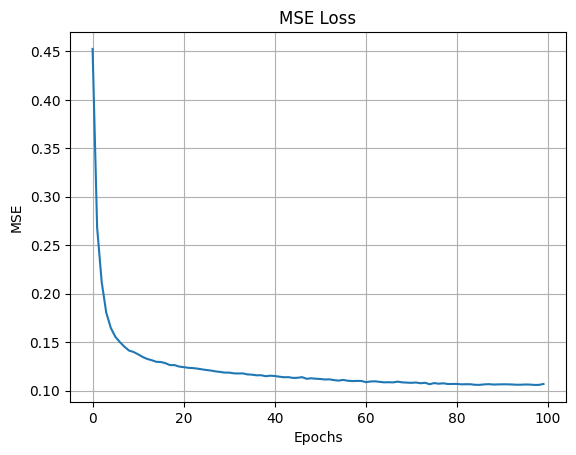

In [ ]:
### Your code goes here ###

class AutoencoderMLP(nn.Module):
    def __init__(self, dropout_rate=0.1):
        super(AutoencoderMLP, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

# Improved training function with warmup and gradient clipping
def train(model, train_loader, criterion, optimizer, epochs=100, warmup_epochs=5):
    model.train()
    loss_list = []

    # Learning rate warmup
    warmup_factor = 1.0 / warmup_epochs

    with tqdm(total=epochs, unit="epoch", position=0, leave=True) as pbar:
        for epoch in range(epochs):
            running_loss = 0.0

            # Warmup learning rate
            if epoch < warmup_epochs:
                lr_scale = warmup_factor * (epoch + 1)
                for param_group in optimizer.param_groups:
                    param_group['lr'] = optimizer.param_groups[0]['initial_lr'] * lr_scale

            for images, _ in train_loader:
                noisy_images = add_gaussian_noise(images)
                optimizer.zero_grad()

                outputs = model(noisy_images)
                loss = criterion(outputs, images)
                loss.backward()

                optimizer.step()
                running_loss += loss.item()

            loss_list.append(running_loss/len(train_loader))
            pbar.set_postfix(loss=running_loss/len(train_loader))
            pbar.update(1)

            # Step the scheduler after warmup
            if epoch >= warmup_epochs:
                scheduler.step()

    plot_loss(loss_list)

# Initialize the improved model and training components
model_ae_mlp = AutoencoderMLP()
criterion = nn.MSELoss()

optimizer = optim.Adam(model_ae_mlp.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=95)  # T_max = epochs - warmup_epochs

# Train the model
train(model_ae_mlp, trainloader, criterion, optimizer, epochs=100, warmup_epochs=5)

Finding one example of each digit...


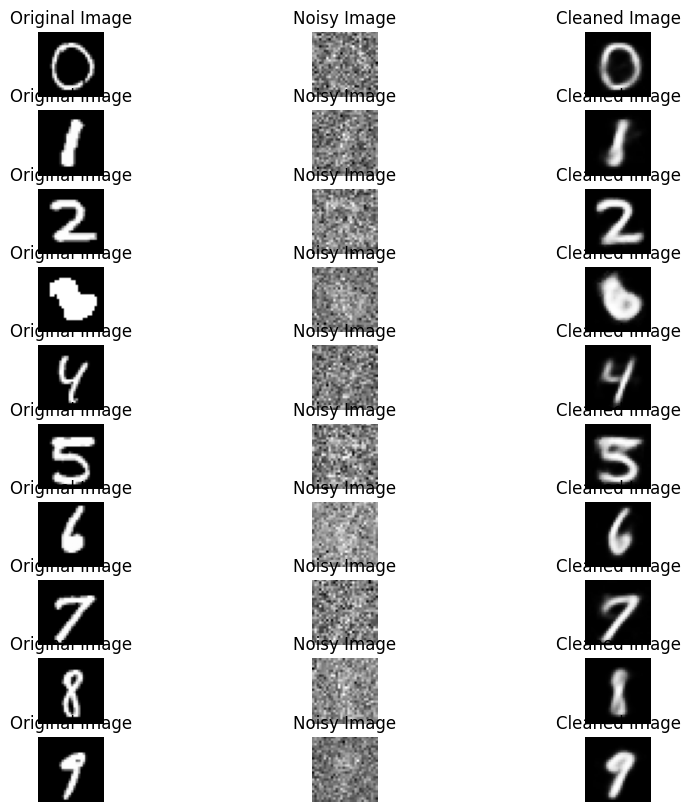

In [ ]:
# Plot the results
plot_results(model_ae_mlp, trainloader)

In [ ]:
# Compute average denoised accuracy over 5 runs
denoised_accs = []
model_ae_mlp.to(device)

for i in range(5):
    acc = compute_accuracy(mlp_clf, testloader, denoise_model=model_ae_mlp, add_noise=True)
    denoised_accs.append(acc)

avg_denoised_acc = np.mean(denoised_accs)

print(f"Average Denoised Image Accuracy: {avg_denoised_acc:.2f}%")

Average Denoised Image Accuracy: 83.86%
